**Prediction Using Decision Tree Algorithm**

A decision tree is a flowchart-like tree structure where each internal node denotes the feature, branches denote the rules and the leaf nodes denote the result of the algorithm. It is a versatile supervised machine-learning algorithm, which is used for both classification and regression problems. It is one of the very powerful algorithms.

Starting with a dataset, we measure the entropy to find a way to split the set until all of the data belongs to the same class

If any new data is fed to the classifier, the purpose is to predict the right class accordingly.

Importing required Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading the Dataset

In [5]:
df = pd.read_csv('/content/IRIS (1) (1).csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


EDA(Exploratory Data Analysis)

In [7]:
df.shape

(150, 5)

To display info about data type

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
#displays statistical measures of the data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
# While training the model we need to remove all the null values or replace the null values
# with some other values like mean median mode.

In [11]:
df.isnull().sum()# to check the null values or missing values
#null values of corresponding columns will be displayed

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

No missing values present in any tuple

Let's see distribution of our target feature i.e Species

In [12]:
# to display number of samples of each class
df['species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [13]:
# Checking for noisy tuples in our Dataset
print(f"Minimun value:\n{df.min()}")

Minimun value:
sepal_length            4.3
sepal_width             2.0
petal_length            1.0
petal_width             0.1
species         Iris-setosa
dtype: object


In [14]:
print(f"Maximum value:\n{df.max()}")

Maximum value:
sepal_length               7.9
sepal_width                4.4
petal_length               6.9
petal_width                2.5
species         Iris-virginica
dtype: object


In [15]:
print(f"Average value:\n{df.mean(numeric_only=True)}")

Average value:
sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
dtype: float64


From the comparison of minimum and maximum value with corresponding mean value we can conclude that there are no huge deviations, hence the datasets are noise free.

Visualization

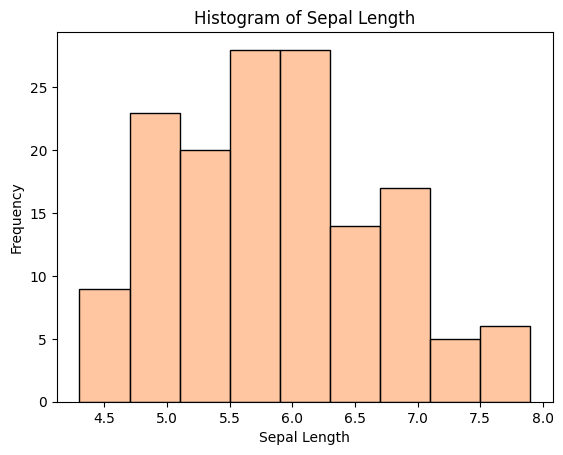

In [17]:
#Histogram
sns.histplot(data=df, x='sepal_length', color=sns.color_palette('pastel')[1])

plt.title('Histogram of Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.show()

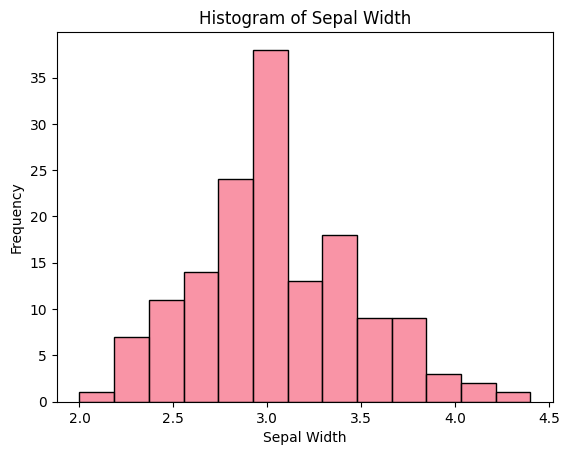

In [18]:
sns.histplot(data=df, x='sepal_width', color=sns.color_palette('husl')[0])

plt.title('Histogram of Sepal Width')
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.show()

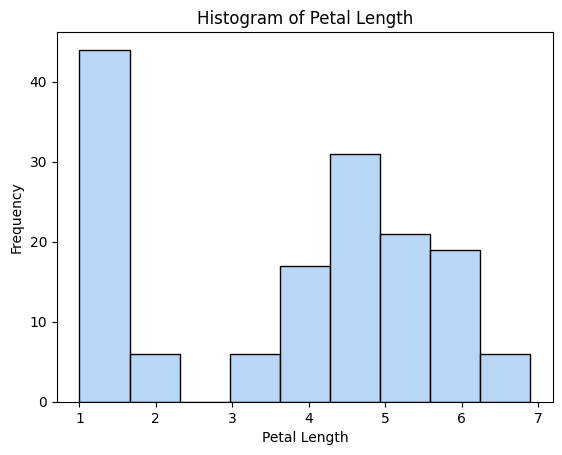

In [19]:
sns.histplot(data=df, x='petal_length', color=sns.color_palette('pastel')[0])

plt.title('Histogram of Petal Length')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()

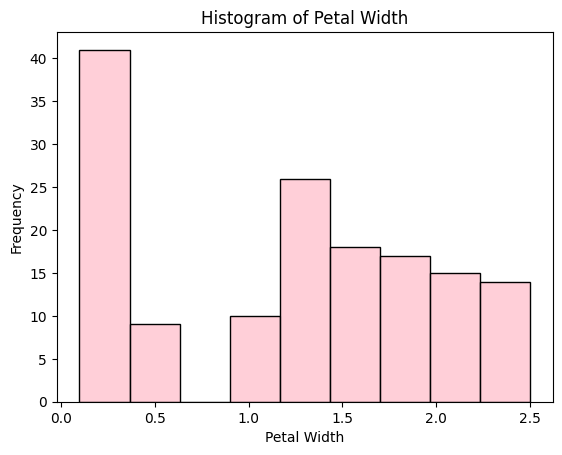

In [21]:
sns.histplot(data=df, x='petal_width', color='pink')
plt.title('Histogram of Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Scatterplot
colors = ['pink','yellow','blue']
species = ['Iris-setosa','Iris-versicolor','Iris-virginica']

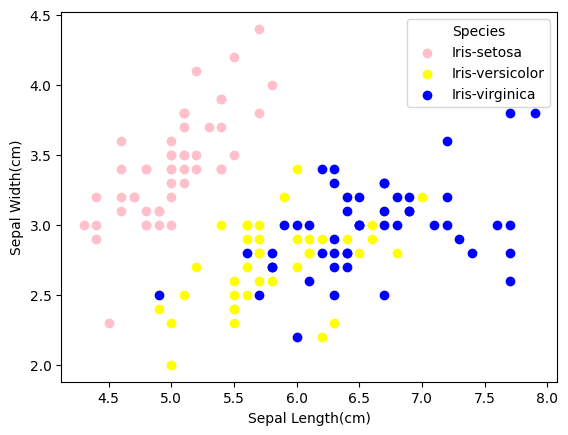

In [24]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_length'], x['sepal_width'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length(cm)")
plt.ylabel("Sepal Width(cm)")
plt.legend(title="Species")

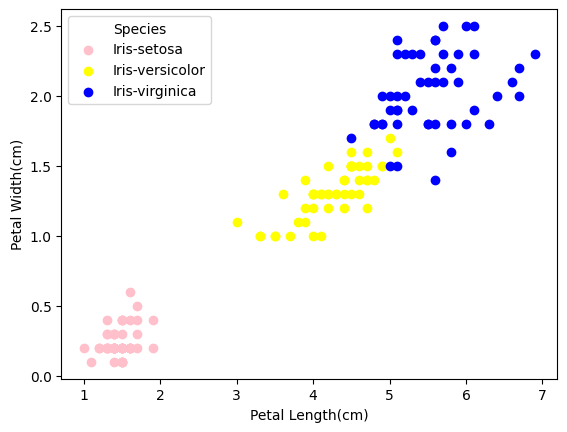

In [25]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['petal_length'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("Petal Length(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend(title="Species")

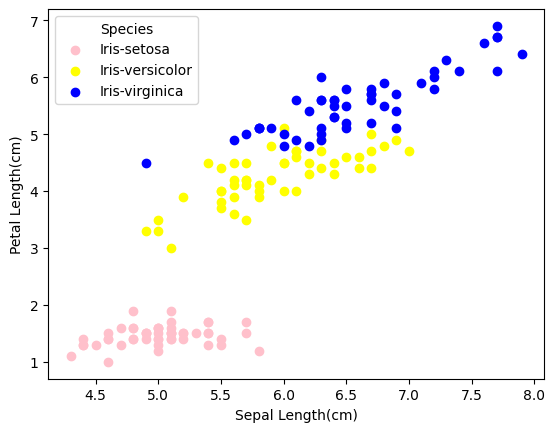

In [27]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_length'], x['petal_length'], c = colors[i], label=species[i])

plt.xlabel("Sepal Length(cm)")
plt.ylabel("Petal Length(cm)")
plt.legend(title="Species")

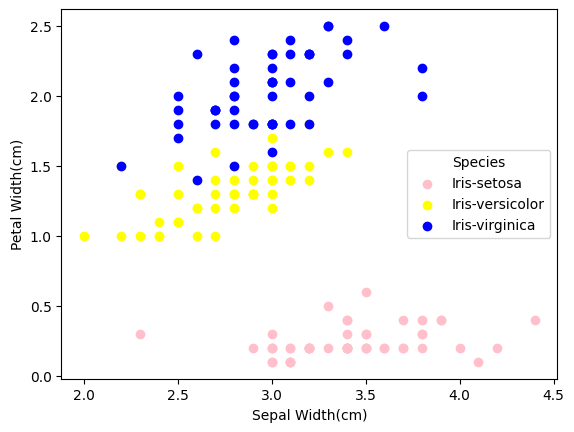

In [28]:
for i in range(3):
  x = df[df['species'] == species[i]] # filter classes from the dataset
  plt.scatter(x['sepal_width'], x['petal_width'], c = colors[i], label=species[i])

plt.xlabel("Sepal Width(cm)")
plt.ylabel("Petal Width(cm)")
plt.legend(title="Species")

Correlation Matrix - A correlation matrix is a statistical technique used to evaluate the relationship between two variables in a data set. The matrix is a table in which every cell contains a correlation coefficient, where 1 is considered a strong relationship between variables, 0 a neutral relationship and -1 a not strong relationship.

The value is in the range of -1 to 1. If two variable have high correlation, we can neglect one variable from those two.

In [29]:
# creating correlation matrix - correlation matrix is used to understand the importance between two variables
df.corr()

<ipython-input-29-59df2d59c36b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<ipython-input-30-e04171561af5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


Text(0.5, 0.98, 'Heat Map')

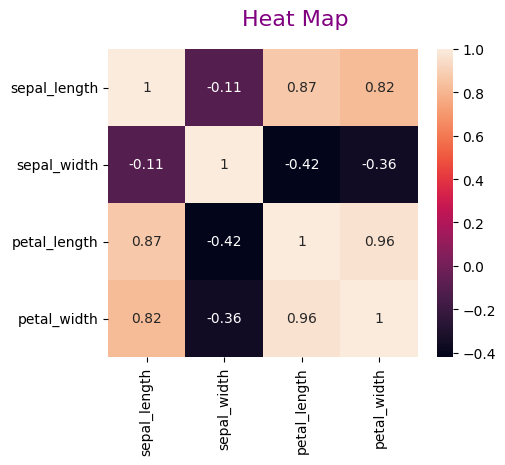

In [30]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(5,4)) # to set the size of the graphs
sns.heatmap(corr, annot=True, ax=ax)
fig.suptitle(t="Heat Map",
             color="purple",
             fontsize=16)

Box Plot -

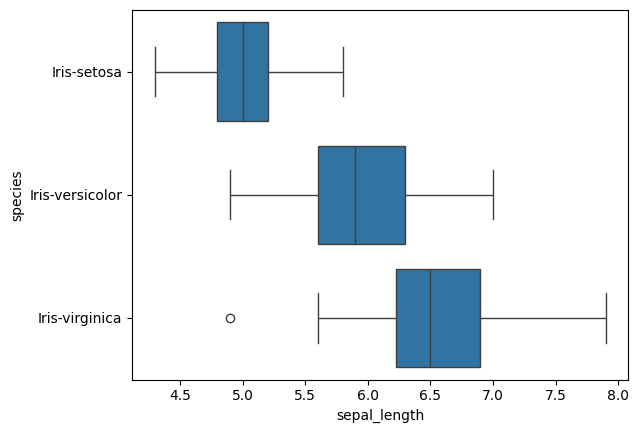

In [31]:
sns.boxplot(x="sepal_length",y="species",data=df);

PairPlot

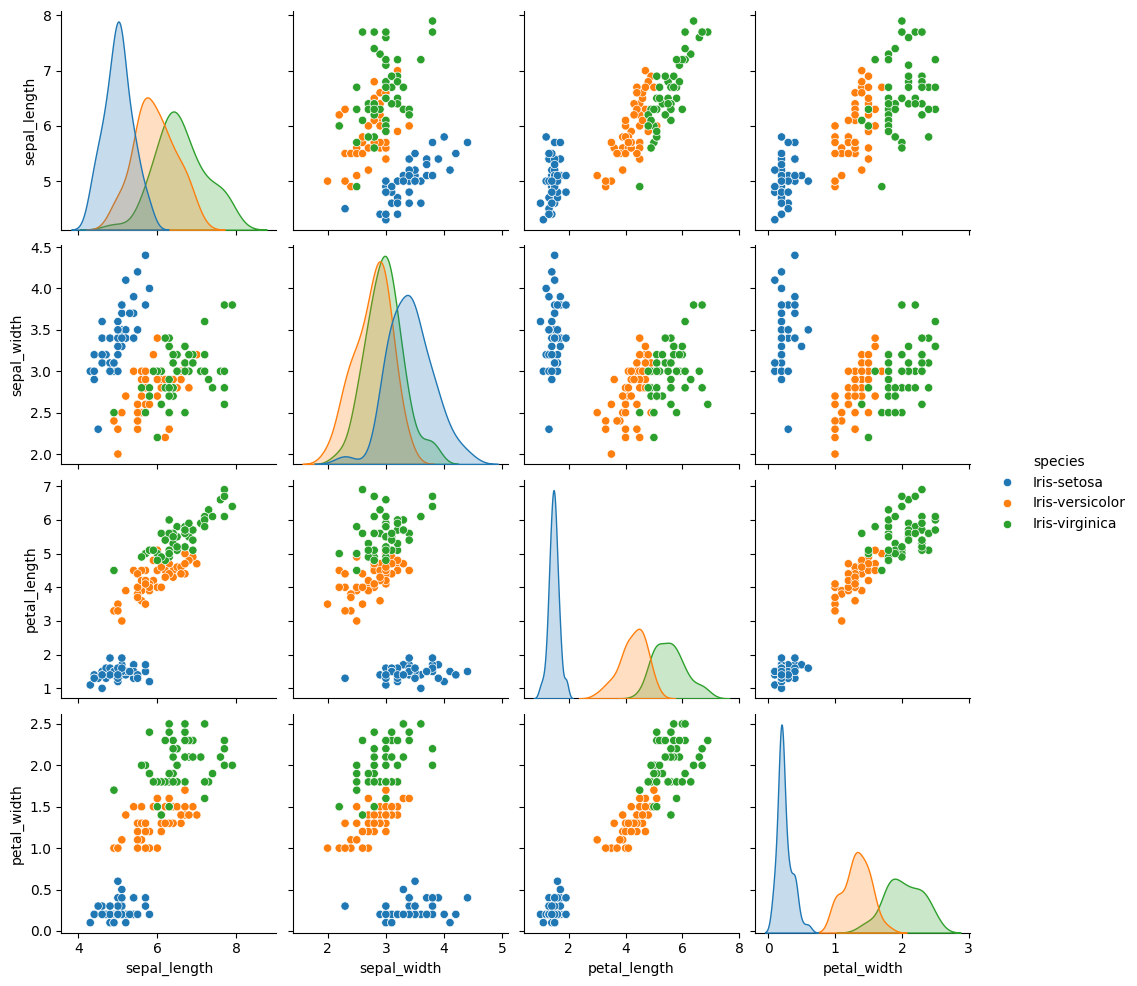

In [33]:
sns.pairplot(data=df,hue="species")

From above EDA we can conclude that iris-setosa species are linearly seperable from other two species. Other two species are not linearly seperable from each other.

Feature Engineering -

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
#selecting one tuple of class = "iris setosa" for prediction purpose
pred_data1 = df.iloc[32] #iloc gets rows(and/or columns) at integer location
pred_data1

sepal_length            5.2
sepal_width             4.1
petal_length            1.5
petal_width             0.1
species         Iris-setosa
Name: 32, dtype: object

In [36]:
#selecting one tuple of class = "iris versicolor" for prediction purpose
pred_data2 = df.iloc[76] #iloc gets rows(and/or columns) at integer location
pred_data2

sepal_length                6.8
sepal_width                 2.8
petal_length                4.8
petal_width                 1.4
species         Iris-versicolor
Name: 76, dtype: object

In [37]:
#selecting one tuple of class = "iris verginica" for prediction purpose
pred_data3 = df.iloc[132] #iloc gets rows(and/or columns) at integer location
pred_data3

sepal_length               6.4
sepal_width                2.8
petal_length               5.6
petal_width                2.2
species         Iris-virginica
Name: 132, dtype: object

In [38]:
df.shape

(150, 5)

In [39]:
# Removing tuples with index 32,72,132 from our dataset
df.drop([32,76,132], inplace=True)
df.shape

(147, 5)

Making x & y features -

In [40]:
x = df.drop("species", axis=1)
y = df["species"]

In [41]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [42]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [43]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [44]:
y.dtypes

dtype('O')

Label Encoding - Label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. It is particularly useful when working with algorithms that require numerical input, as most machine learning models can only operate on numerical data.

In [45]:
# importing module for label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [46]:
df["Encoded Species"] = le.fit_transform(y.ravel()) #Appending to our dataset
#ravel function is used to create a contiguous flattened array.It returns a 1-D array containing the elements of the input.
y = le.fit_transform(y.ravel())
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [47]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Encoded Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [48]:
Encoded_class = pd.DataFrame({'Species':["Iris-setosa","Iris-versicolor","Iris-Verginica"],
                              'Encoded':[0,1,2]})
Encoded_class

,Species,Encoded
0,Iris-setosa,0
1,Iris-versicolor,1
2,Iris-Verginica,2


Preparing Training and Test Data and Fitting to the Model

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

np.random.seed(65)
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)
clf = DecisionTreeClassifier(criterion="gini", min_samples_split=2)
clf.fit(x_train, y_train)
score = clf.score(x_test, y_test)
print(f"Module Accuracy on Test Data = {score*100:.2f}%")

Module Accuracy on Test Data = 96.67%


Model Evaluation

In [50]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = clf.predict(x_test)
print(f"Classification Report:\n\n{classification_report(y_test,y_pred)}")

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      1.00      0.94         8
           2       1.00      0.92      0.96        12

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [51]:
cf_matrix = confusion_matrix(y_test,y_pred)
print(f"Confusion Matrix:\n\n{cf_matrix}")

Confusion Matrix:

[[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]


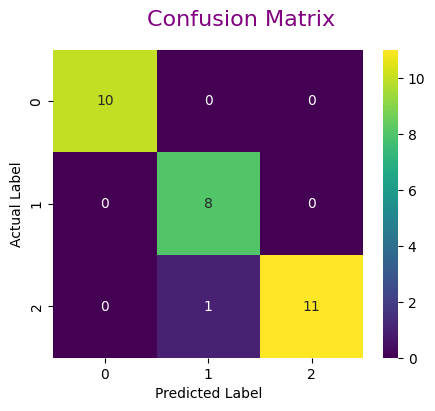

In [52]:
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(cf_matrix, annot=True, cmap='viridis')

fig.suptitle(t="Confusion Matrix", color="purple", fontsize=16)
ax.set(xlabel="Predicted Label", ylabel="Actual Label")

plt.show()

In [53]:
print(f"Accuracy Score:\n\n{accuracy_score(y_test, y_pred)*100:.2f}%")

Accuracy Score:

96.67%


Decision Tree Visualization

In [54]:
from sklearn import tree

[Text(0.5, 0.9, 'Petal Length <= 2.35\ngini = 0.666\nsamples = 117\nvalue = [39, 41, 37]'),
 Text(0.4230769230769231, 0.7, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'),
 Text(0.5769230769230769, 0.7, 'Petal Width <= 1.75\ngini = 0.499\nsamples = 78\nvalue = [0, 41, 37]'),
 Text(0.3076923076923077, 0.5, 'Petal Length <= 4.95\ngini = 0.13\nsamples = 43\nvalue = [0, 40, 3]'),
 Text(0.15384615384615385, 0.3, 'Petal Width <= 1.65\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.07692307692307693, 0.1, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.23076923076923078, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.3, 'Petal Width <= 1.55\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.38461538461538464, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.5384615384615384, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.8461538461538461, 0.5, 'Petal Length <= 4.85\ngini = 0.056\nsamples = 35\nvalue = [0, 1, 34]'

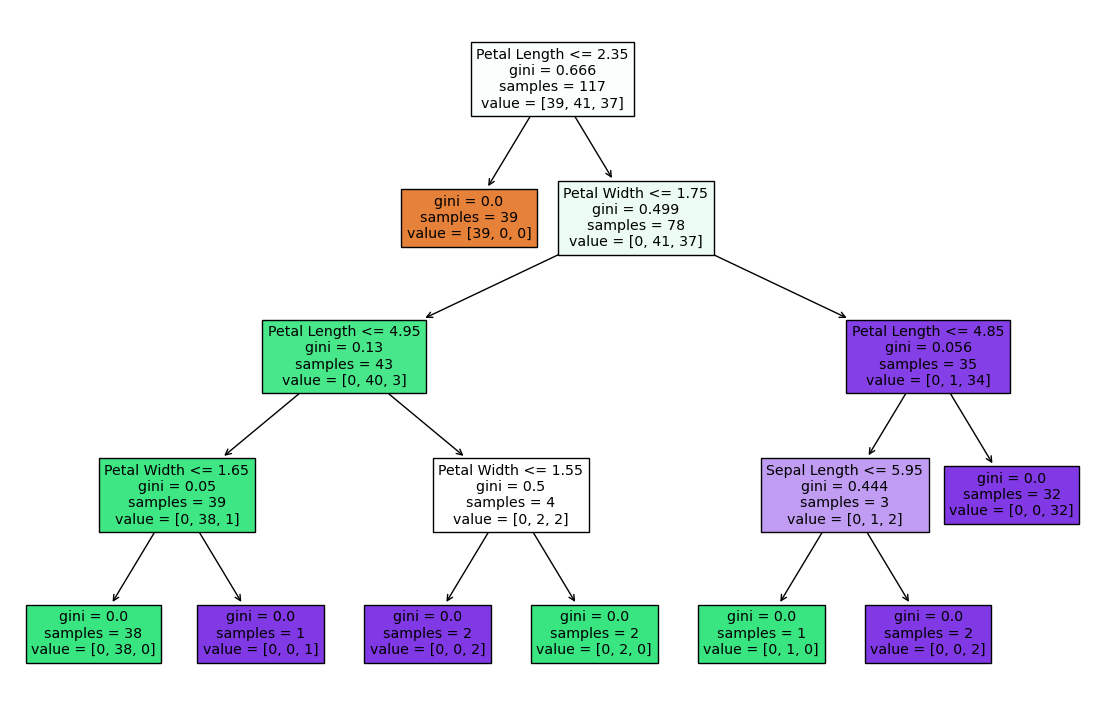

In [55]:
plt.figure(figsize=(14,9))
tree.plot_tree(clf, filled=True, feature_names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

Making Prediction on Unseen Data

In [56]:
Encoded_class.set_index("Species")

,Encoded
Species,
Iris-setosa,0
Iris-versicolor,1
Iris-Verginica,2


In [57]:
pred_data1

sepal_length            5.2
sepal_width             4.1
petal_length            1.5
petal_width             0.1
species         Iris-setosa
Name: 32, dtype: object

In [58]:
#Making Prediction with data1 with Species = "Iris-setosa"
pred_x1 = pd.DataFrame(np.array([5.2, 4.1, 1.5, 0.1]).reshape(1,-1),
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
pred_y1 = clf.predict(pred_x1)
pred_class1 = Encoded_class[Encoded_class["Encoded"] == pred_y1[0]]["Species"].item()
print(f"Predicted class by model on pred_data1 : {pred_class1}")

Predicted class by model on pred_data1 : Iris-setosa


In [59]:
pred_data2

sepal_length                6.8
sepal_width                 2.8
petal_length                4.8
petal_width                 1.4
species         Iris-versicolor
Name: 76, dtype: object

In [60]:
#Making Prediction with data2 with Species = "Iris-versicolor"
pred_x2 = pd.DataFrame(np.array([6.8, 2.8, 4.8, 1.4]).reshape(1,-1),
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
pred_y2 = clf.predict(pred_x2)
pred_class2 = Encoded_class[Encoded_class["Encoded"] == pred_y2[0]]["Species"].item()
print(f"Predicted class by model on pred_data1 : {pred_class2}")

Predicted class by model on pred_data1 : Iris-versicolor


In [61]:
pred_data3

sepal_length               6.4
sepal_width                2.8
petal_length               5.6
petal_width                2.2
species         Iris-virginica
Name: 132, dtype: object

In [62]:
#Making Prediction with data3 with Species = "Iris-vergininca"
pred_x3 = pd.DataFrame(np.array([6.8, 2.8, 5.6, 2.2]).reshape(1,-1),
                       columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
pred_y3 = clf.predict(pred_x3)
pred_class3 = Encoded_class[Encoded_class["Encoded"] == pred_y3[0]]["Species"].item()
print(f"Predicted class by model on pred_data1 : {pred_class3}")

Predicted class by model on pred_data1 : Iris-Verginica


Hence, All the classes predicted by our model were correct.